In [37]:
import numpy as np 
import pandas as pd
import Bio
from Bio.pairwise2 import format_alignment
import copy
import Process_SeqLibrary_Finkelsteinlab as preprocess
reload(preprocess);
import plotting_Finkelsteinlab as pltData
reload(pltData);
%matplotlib inline 
import matplotlib.pylab as plt 

### Nucleaseq Cas9 Target E

In [2]:
filename = 'ECas9_cleavage_rate_and_y0.txt'
Path = '../data_nucleaseq_Finkelsteinlab/targetE/'
data = pd.read_table(Path+filename, usecols=['target', 'cleavage_rate', 'cleavage_rate_5th_pctl', 'cleavage_rate_95th_pctl'])
data.rename(columns={'target':'Sequence'}, inplace=True)

In [3]:
## Arguments
Cas='Cas9'
on_target = 'TTTAGACGCATAAAGATGAGACGCTGG'
seq_colname = 'Sequence'
output_colnames = ['cleavage_rate', 'cleavage_rate_5th_pctl', 'cleavage_rate_95th_pctl']
Canonical_PAM = True
Mut_type = ['OT','r']
Mut_min = 0
Mut_max = 2
out_file_name = filename.split('.')[0]
out_path = '../data_nucleaseq_Finkelsteinlab/targetE/'

In [4]:
new_data = preprocess.process_Finkelstein_Library(data, on_target, seq_colname, output_colnames, Cas, 
                                                  Canonical_PAM = True, Mut_type = ['OT','r'], Mut_min = 0, Mut_max = 2,
                                                  out_file_name = out_file_name, out_path = out_path, nofilter = False,
                                                  save_data = True)


In [5]:
new_data.head()

,Sequence,cleavage_rate,cleavage_rate_5th_pctl,cleavage_rate_95th_pctl,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
5,GTTAGACGCAAAAAGATGAGACGCTGG,0.006562,0.005024,0.008606,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n|||||||||||||.||||||\nCG...,CGCAGAGTAGAAATA-CGCAG\n||||||||||||| | |||||\n...,r:14:A,r,1.0,14
6,TTTAGATGCATAAAGATGAGGCGCTGG,0.000542,0.000439,0.000817,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n|||.|||||||||||||.||\nCG...,CGCAG-AGTAGAAATACGC-AG\n||| | |||||||||||| ||...,r:4:G|r:18:T,r,2.0,4|18
7,TTTAGACGCATAAAGATGAGACGCTGG,0.182457,0.111880,0.191265,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||||\nCG...,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||||\nCG...,OT,OT,0.0,
12,TTTAAGACGCATAAAGATGAGACGCTGG,0.168158,0.112466,0.186088,True,TGG,True,1,CGCAGAGTAGAAATACGCAG-\n|||||||||||||||||||| \n...,CGCAGAGTAGAAATACGCAG-\n|||||||||||||||||||| \n...,OT,OT,0.0,
13,TTTAGACGCATAAAGATGAGACGCTGG,0.210355,0.158494,0.312250,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||||\nCG...,CGCAGAGTAGAAATACGCAG\n||||||||||||||||||||\nCG...,OT,OT,0.0,


In [6]:
full_data = preprocess.process_Finkelstein_Library(data,on_target,seq_colname,output_colnames,Cas='Cas9', 
                                                   out_path = out_path,out_file_name = out_file_name,
                                                   nofilter = True, save_data = True)

In [7]:
full_data.head() 

,Sequence,cleavage_rate,cleavage_rate_5th_pctl,cleavage_rate_95th_pctl,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
0,TTTAGAGCGTATTTCATGAGACGCTGG,2.657239e-06,6.222793e-24,0.000004,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\n|||||||||.........||\nCG...,CGCAGAGTAGAAA-T--AC-GC-AG\n|||||||| | | | ...,r:10:C|r:11:T|r:12:T|r:13:T|r:14:A|r:15:T|r:16...,r,9.0,10|11|12|13|14|15|16|17|18
1,TTTAGACTGCGATAAAGATGAGACGCTGG,2.767674e-22,1.326366e-25,0.000005,False,TGG,True,2,CGCAGAGTAGAAATA-CG-CAG\n||||||||||||||| || |||...,CGCAGAGTAGAAATA-CG-CAG\n||||||||||||||| || |||...,i:16:G|i:18:T,i,2.0,16|18
2,TTTAGACGCATAAAGATGAGACGCCTTAA,1.199120e-06,1.717058e-27,0.000002,False,TAA,False,2,-C-GCAGAGTAGAAATACGCAG\n | |||||||||||||||||||...,-C-GCAGAGTAGAAATACGCAG\n | |||||||||||||||||||...,i:1:T|i:2:C,i,2.0,1|2
3,TTTAGACGCATAAAGATGAGACGCTAGGA,5.308185e-05,4.825889e-05,0.000069,False,GGA,False,2,--CGCAGAGTAGAAATACGCAG\n ||||||||||||||||||||...,--CGCAGAGTAGAAATACGCAG\n ||||||||||||||||||||...,i:1:A|i:1:T,i,2.0,1|1
4,TTTAGACGTCAGTAAAGATGAGACGCTGG,8.747661e-25,7.856313e-27,0.000001,False,TGG,True,2,CGCAGAGTAGAAAT-AC-GCAG\n|||||||||||||| || ||||...,CGCAGAGTAGAAAT-AC-GCAG\n|||||||||||||| || ||||...,i:15:G|i:17:T,i,2.0,15|17


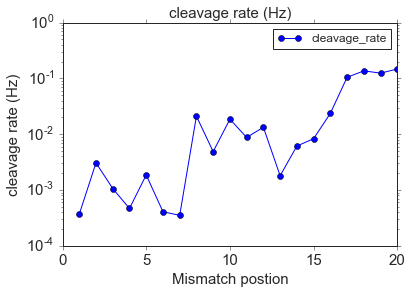

In [46]:
reload(pltData);
single_mut_data_mean = pltData.plot_single_mut_data(full_data, 'cleavage_rate', 'r', Canonical=True, data_name='cleavage rate (Hz)', Plot=True, 
                                                    logplot=True, SaveFigures=False)

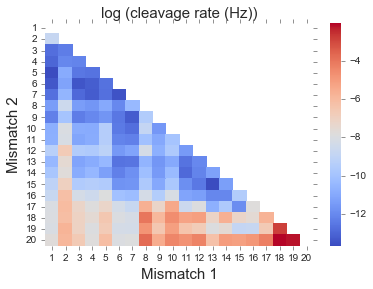

In [74]:
reload(pltData);
_, _ = pltData.plot_double_mut_data(full_data, 'cleavage_rate', 'r', Canonical=True, Ng=20, data_name='log (cleavage rate (Hz))', Plot=True, logplot=True,
                        SaveFigures=False, figure_name='./Figure.pdf')